## Crime's Driving Forces
##### A look into Toronto's Neighborhoods
___

## installed following packages (Note: initially ran pipeline, after presentation. Decided to run KNN for classfication problem)

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
import re

# Date time
from datetime import datetime

#Pandas Profiling
import pandas_profiling

#Sklearn
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
%matplotlib inline



In [164]:
from IPython.terminal.embed import InteractiveShellEmbed

ip_shell = InteractiveShellEmbed()

present_working_directory = ip_shell.magic("%pwd")
present_working_directory

'C:\\Users\\James'

In [165]:
msi = pd.read_csv(r'MSI- 1.csv')
neighborhood = pd.read_csv(r'Neighborhoods.csv')
df_neighbors = neighborhood.iloc[:,6:]

In [166]:
df_neighbors.columns

Index(['Subopic-Characteristic', 'City of Toronto', '129', '128', '20', '95',
       '42', '34', '76', '52',
       ...
       '37', '7', '137', '64', '60', '94', '100', '97', '27', '31'],
      dtype='object', length=142)

In [167]:
df_neighbors = df_neighbors.T.reset_index()

In [168]:
display(df_neighbors.head())
msi.head()

,index,0,1,2,3,4,5,6,7,8,...,293,294,295,296,297,298,299,300,301,302
0,Subopic-Characteristic,Population density per square kilometre-Popula...,Age characteristics-Children (0-14 years),Age characteristics-Youth (15-24 years),Age characteristics-Working Age (25-54 years),Age characteristics-Pre-retirement (55-64 years),Age characteristics-Seniors (65+ years),Age characteristics-Older Seniors (85+ years),Age characteristics-Male: 0 to 04 years,Age characteristics-Male: 05 to 09 years,...,Selected places of birth for the immigrant pop...,Selected places of birth for the immigrant pop...,Selected places of birth for the immigrant pop...,Selected places of birth for the immigrant pop...,Selected places of birth for the immigrant pop...,Selected places of birth for the immigrant pop...,Selected places of birth for the immigrant pop...,Selected places of birth for the immigrant pop...,Selected places of birth for the immigrant pop...,Selected places of birth for the immigrant pop...
1,City of Toronto,4334,398135,340270,1229555,336670,426945,66000,69895,69350,...,3985,26830,6010,34750,118775,52900,5575,7695,30580,52450
2,129,3929,3840,3705,11305,4230,6045,925,660,695,...,45,65,20,295,1180,2210,10,115,495,600
3,128,3034,3075,3360,9965,3265,4105,555,575,540,...,25,65,50,435,1030,1070,40,140,330,460
4,20,2435,1760,1235,5220,1825,2015,320,360,270,...,10,40,35,15,420,25,0,0,35,85


,Hood_ID,Neighbourhoods_Proper,Assault,Auto Theft,Break and Enter,Robbery,Theft Over,Grand Total
0,1,West Humber-Clairville,1375,1684,658,376,245,4338
1,2,Mount Olive-Silverstone-Jamestown,1319,292,168,460,18,2257
2,3,Thistletown-Beaumond Heights,284,109,104,103,12,612
3,4,Rexdale-Kipling,358,137,90,100,9,694
4,5,Elms-Old Rexdale,323,96,63,93,6,581


In [169]:
df_neighbors.columns = df_neighbors.iloc[0].to_list()

#Drop unecessary rows
df_neighbors = df_neighbors.drop(0, axis=0)
df_neighbors = df_neighbors.drop(1, axis=0)

#Reset the index
df_neighbors.reset_index(inplace=True, drop= True)

In [170]:
msi['Hood_ID'] = msi['Hood_ID'].astype(str)

In [171]:
df = pd.merge(msi,df_neighbors, right_on = 'Subopic-Characteristic', left_on= 'Hood_ID', how = 'left').drop('Hood_ID', axis = 1)

In [172]:
df

,Neighbourhoods_Proper,Assault,Auto Theft,Break and Enter,Robbery,Theft Over,Grand Total,Subopic-Characteristic,Population density per square kilometre-Population density per square kilometre,Age characteristics-Children (0-14 years),...,Selected places of birth for the immigrant population-Japan,Selected places of birth for the immigrant population-Korea; South,Selected places of birth for the immigrant population-Lebanon,Selected places of birth for the immigrant population-Pakistan,Selected places of birth for the immigrant population-Philippines,Selected places of birth for the immigrant population-Sri Lanka,Selected places of birth for the immigrant population-Syria,Selected places of birth for the immigrant population-Taiwan,Selected places of birth for the immigrant population-Viet Nam,Selected places of birth for the immigrant population-Other places of birth in Asia
0,West Humber-Clairville,1375,1684,658,376,245,4338,1,1117,5060,...,20,45,30,505,1265,585,10,30,260,355
1,Mount Olive-Silverstone-Jamestown,1319,292,168,460,18,2257,2,7291,7090,...,10,45,55,900,645,945,230,0,365,380
2,Thistletown-Beaumond Heights,284,109,104,103,12,612,3,3130,1730,...,0,15,30,285,220,120,50,0,115,85
3,Rexdale-Kipling,358,137,90,100,9,694,4,4229,1640,...,0,20,10,230,455,90,0,0,130,155
4,Elms-Old Rexdale,323,96,63,93,6,581,5,3306,1805,...,0,90,0,110,410,85,10,10,150,95
5,Kingsview Village-The Westway,557,243,185,109,22,1116,6,4356,4240,...,0,170,70,875,540,205,35,20,165,265
6,Willowridge-Martingrove-Richview,450,227,231,151,22,1081,7,4007,3555,...,20,290,10,540,410,200,10,25,90,220
7,Humber Heights-Westmount,195,124,136,47,19,521,8,3981,1450,...,0,90,10,15,125,10,0,25,0,55
8,Edenbridge-Humber Valley,112,104,212,26,19,473,9,2840,2120,...,0,150,25,40,160,10,20,10,60,180
9,Princess-Rosethorn,83,94,131,38,17,363,10,2138,1770,...,40,120,0,10,45,70,20,20,30,120


##Preprocessing/ Data Exploration

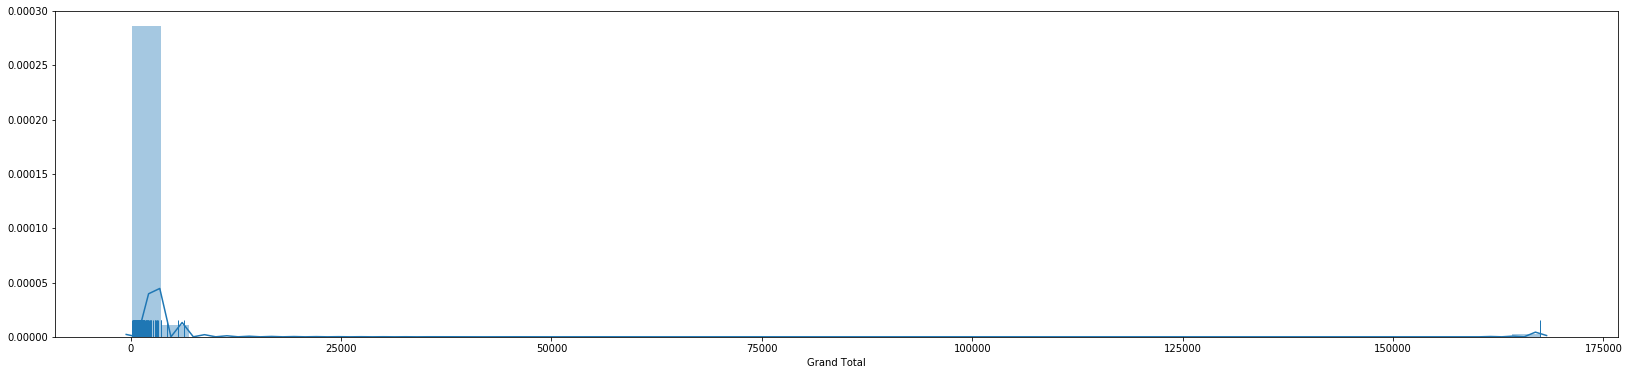

In [173]:
plt.figure(figsize= (28,6))
sns.distplot(df['Grand Total'], hist=True, rug=True);

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141 entries, 0 to 140
Columns: 311 entries, Neighbourhoods_Proper to Selected places of birth for the immigrant population-Other places of birth in Asia
dtypes: int64(6), object(305)
memory usage: 343.7+ KB


In [175]:
#Change to int
df.iloc[:,1:] = df.iloc[:,1:].astype(float)

#Move neighborhood id to front and assign to index - in place
mid = df['Subopic-Characteristic']
df.drop(labels=['Subopic-Characteristic'], axis=1,inplace = True)
df.insert(0, 'id', mid)
df.set_index('id', drop = True, inplace= True)

In [176]:
corr = df.corr()
corr = round(pd.DataFrame.from_records(corr[['Assault' ,'Auto Theft', 'Break and Enter', 'Robbery','Theft Over', 'Grand Total']],index = list(corr.columns)).sort_values(by=['Grand Total']),2)

In [177]:
#Dummy correlation lookup table
corr[corr['Grand Total'] > 0.7]

,Assault,Auto Theft,Break and Enter,Robbery,Theft Over,Grand Total
"Total - Household total income groups in 2015 for private households - 100% data-$30,000 to $34,999",0.72,0.32,0.62,0.60,0.55,0.71
"Total - Household total income groups in 2015 for private households - 100% data-$45,000 to $49,999",0.71,0.33,0.65,0.58,0.59,0.71
"Total - Household total income groups in 2015 for private households - 100% data-$70,000 to $79,999",0.71,0.33,0.70,0.51,0.66,0.72
"Total - Household total income groups in 2015 for private households - 100% data-$60,000 to $69,999",0.72,0.33,0.69,0.53,0.65,0.72
"Total - Household total income groups in 2015 for private households - 100% data-$40,000 to $44,999",0.73,0.33,0.64,0.60,0.58,0.72
"Total - Household total income groups in 2015 for private households - 100% data-$50,000 to $59,999",0.72,0.34,0.67,0.57,0.62,0.72
Age characteristics-Working Age (25-54 years),0.72,0.32,0.73,0.54,0.66,0.72
Age characteristics-Male: 25 to 29 years,0.74,0.24,0.72,0.50,0.70,0.72
"Total - Household total income groups in 2015 for private households - 100% data-$20,000 to $24,999",0.76,0.23,0.66,0.60,0.57,0.73
"Total - Household total income groups in 2015 for private households - 100% data-$35,000 to $39,999",0.73,0.33,0.64,0.62,0.58,0.73


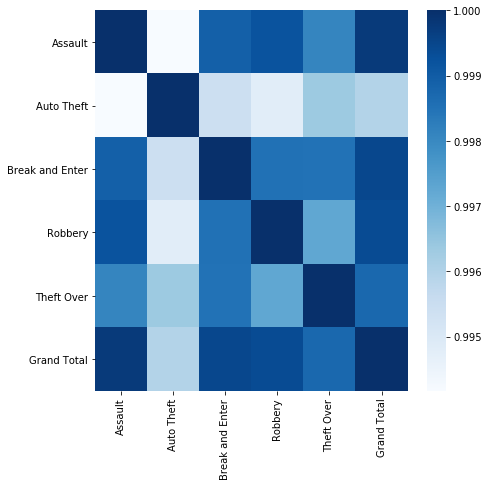

In [178]:
plt.figure(figsize=(7,7))
sns.heatmap(msi.corr(), cmap = 'Blues')

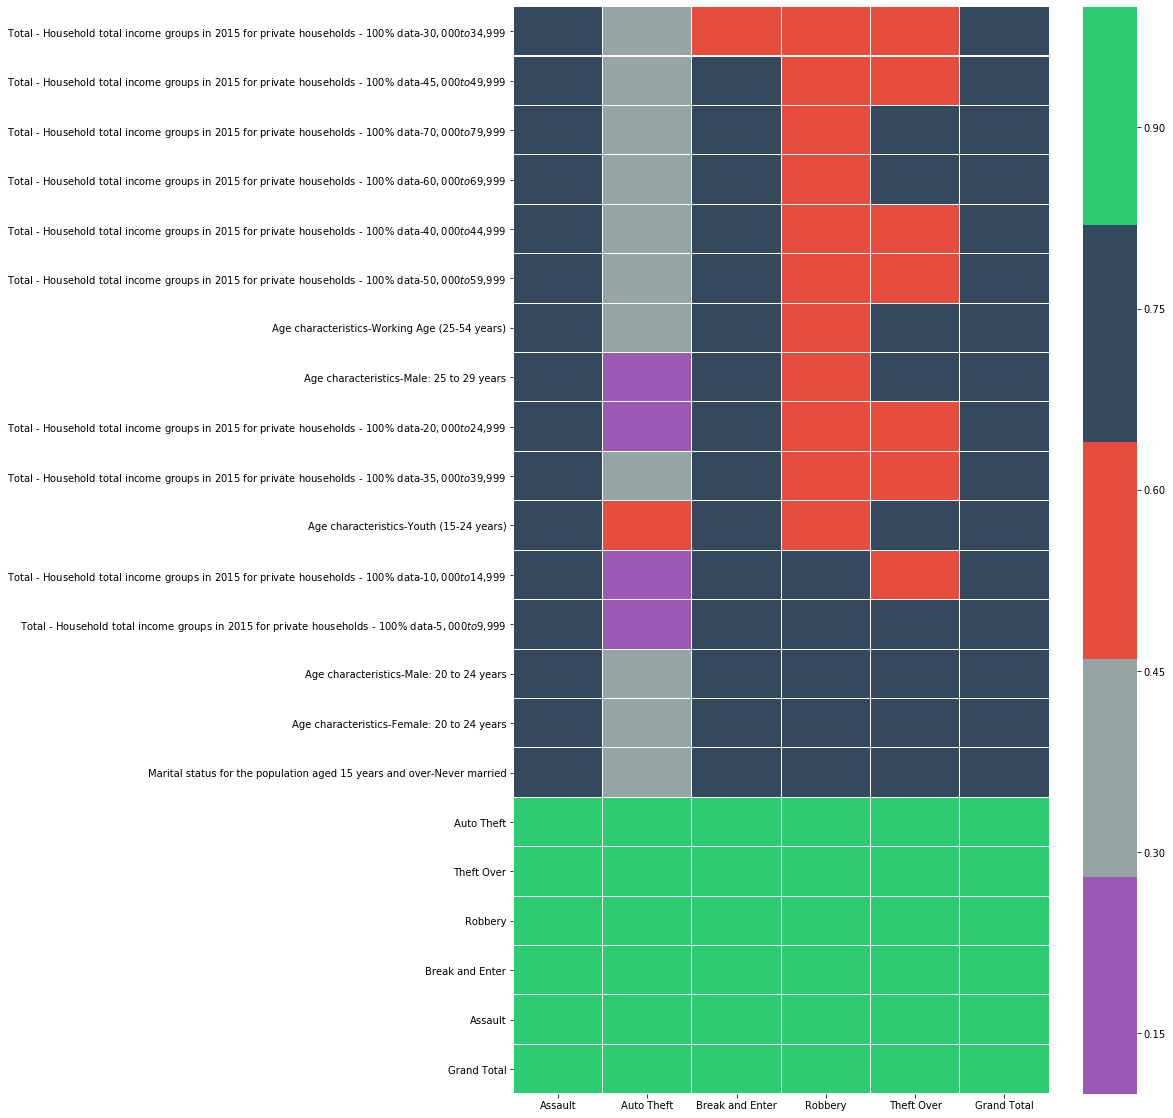

In [179]:
plt.figure(figsize = (12,20))
sns.heatmap(corr[corr['Grand Total'] > 0.7], cmap = ["#9b59b6", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"],linecolor = 'white', linewidth = .05)

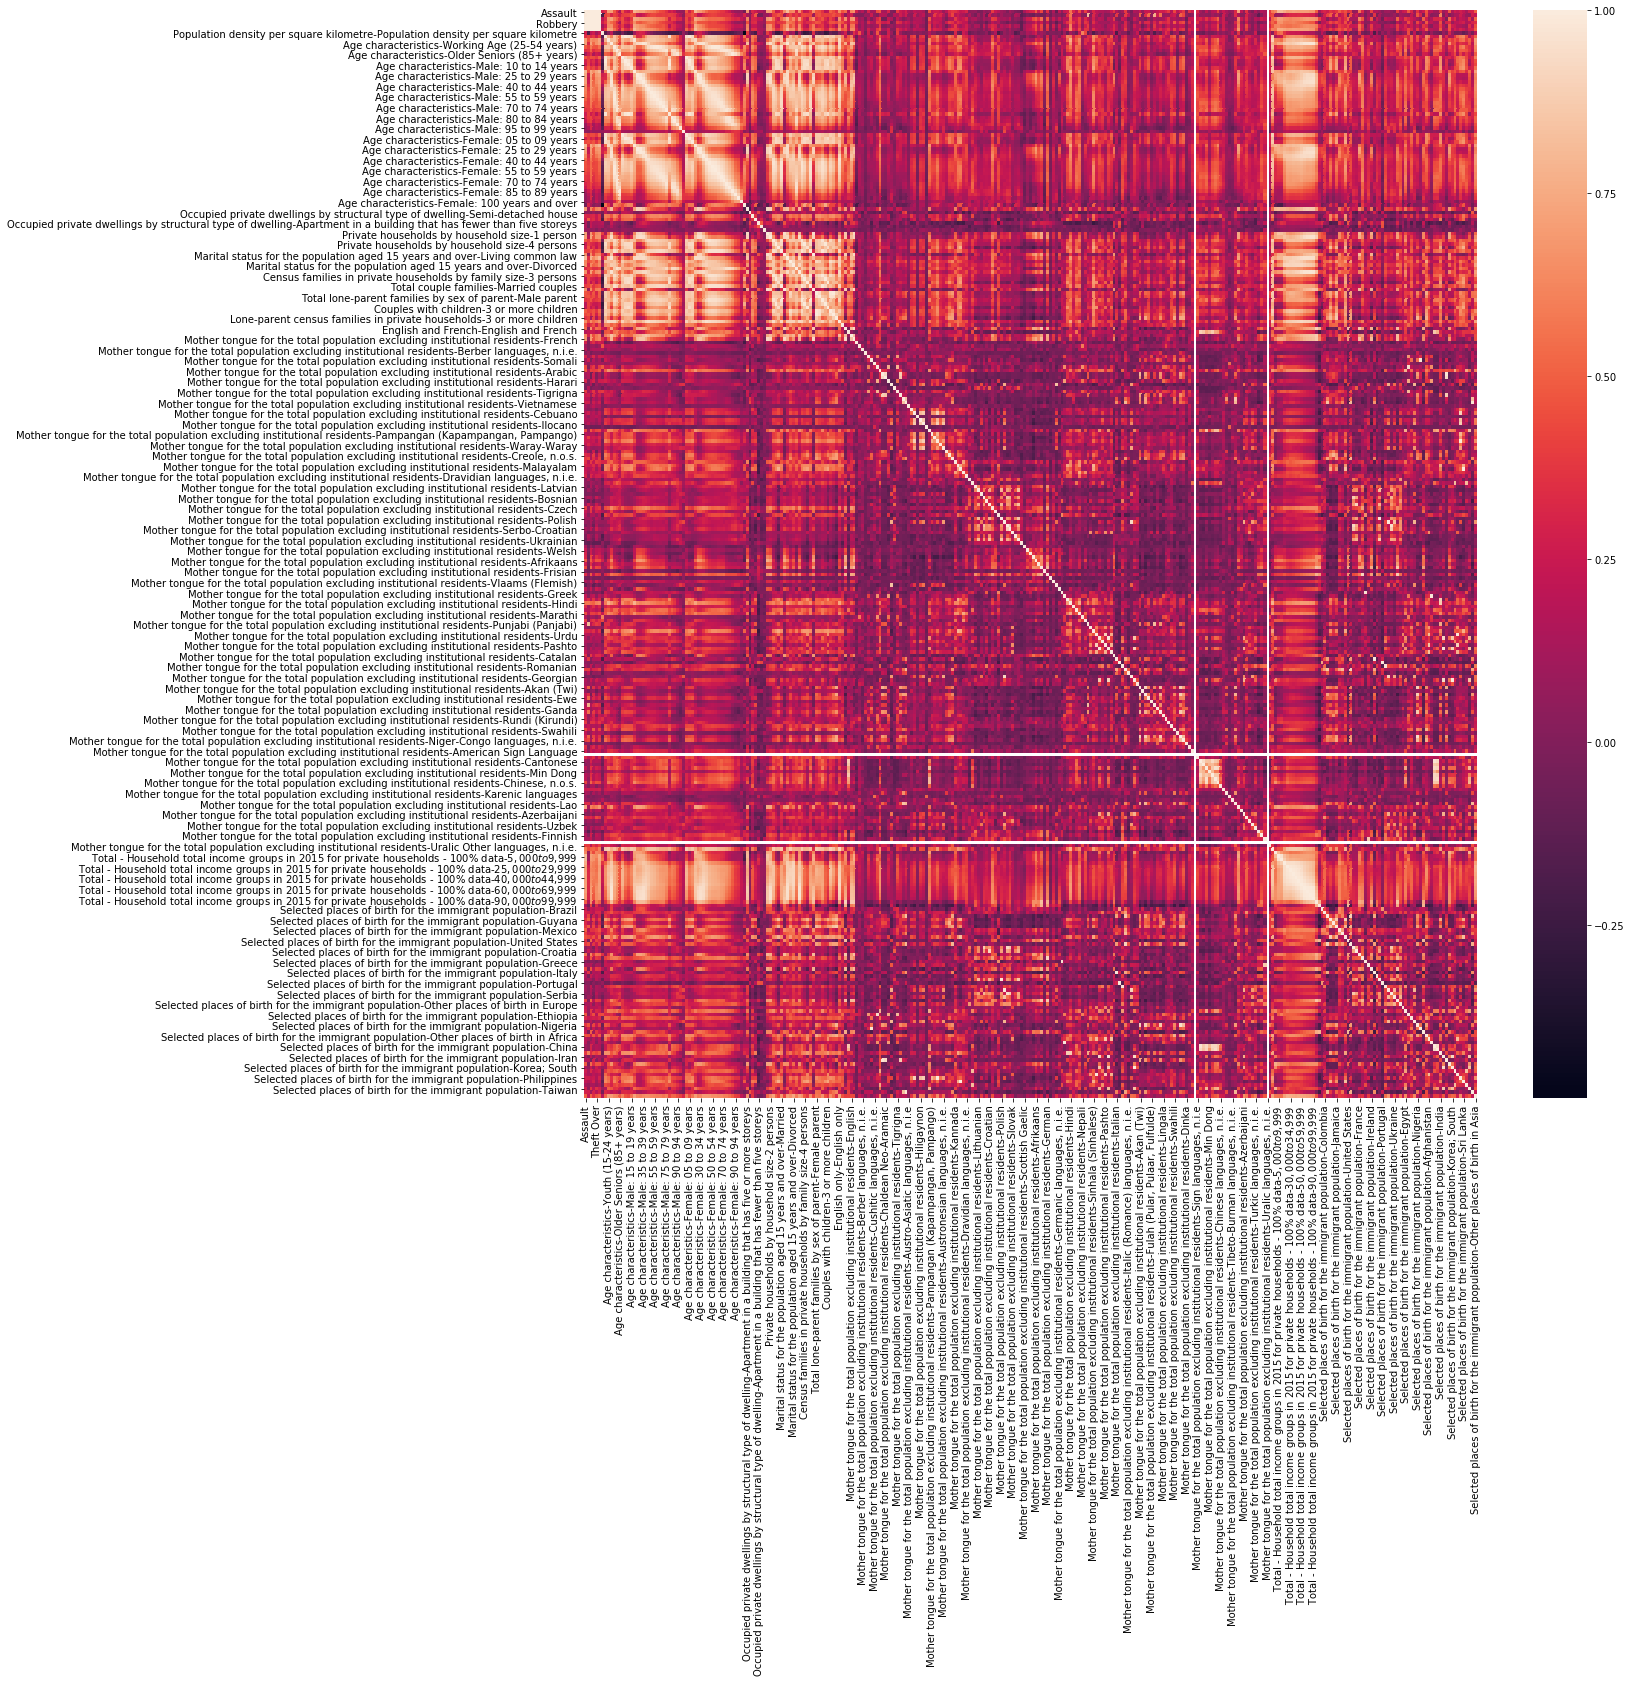

In [180]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr())

In [181]:
#Get rid of NAN row
df = df[~df['Neighbourhoods_Proper'].isna()]

In [22]:
## Let's gather total population by district 
df['population_total'] = df[["Age characteristics-Children (0-14 years)","Age characteristics-Youth (15-24 years)", "Age characteristics-Working Age (25-54 years)","Age characteristics-Pre-retirement (55-64 years)",
"Age characteristics-Seniors (65+ years)","Age characteristics-Older Seniors (85+ years)"]].sum(axis = 1)

C:\Users\James\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
df.columns

Index(['Neighbourhoods_Proper', 'Assault', 'Auto Theft', 'Break and Enter',
       'Robbery', 'Theft Over', 'Grand Total',
       'Population density per square kilometre-Population density per square kilometre',
       'Age characteristics-Children (0-14 years)',
       'Age characteristics-Youth (15-24 years)',
       ...
       'Selected places of birth for the immigrant population-Korea; South',
       'Selected places of birth for the immigrant population-Lebanon',
       'Selected places of birth for the immigrant population-Pakistan',
       'Selected places of birth for the immigrant population-Philippines',
       'Selected places of birth for the immigrant population-Sri Lanka',
       'Selected places of birth for the immigrant population-Syria',
       'Selected places of birth for the immigrant population-Taiwan',
       'Selected places of birth for the immigrant population-Viet Nam',
       'Selected places of birth for the immigrant population-Other places of birth in A

In [24]:
df['assault_rate']= df["Assault"]/df["population_total"]
df['auto_theft_rate']= df["Auto Theft"]/df["population_total"]
df['be_rate']= df["Break and Enter"]/df["population_total"]
df['robbery_rate']= df["Robbery"]/df["population_total"]
df['theft_over_rate']= df["Theft Over"]/df["population_total"]
df['total_rate']= df["Grand Total"]/df["population_total"]

C:\Users\James\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\James\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\James\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [25]:
y = df.iloc[:,-6:]
X = df.iloc[:,7:-10]

In [26]:
#We need to get rid of Multicolinierity

import time
from statsmodels.stats.outliers_influence import variance_inflation_factor    
from joblib import Parallel, delayed

def calculate_vif_(X, thresh=5.0):
    variables = [X.columns[i] for i in range(X.shape[1])]
    dropped=True
    while dropped:
        dropped=False
        print(len(variables))
        vif = Parallel(n_jobs=4,verbose=5)(delayed(variance_inflation_factor)(X[variables].values, ix) for ix in range(len(variables)))

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print(time.ctime() + ' dropping \'' + X[variables].columns[maxloc] + '\' at index: ' + str(maxloc))
            variables.pop(maxloc)
            dropped=True

    print('Remaining variables:')
    print([variables])
    return X[[i for i in variables]]

X2 = calculate_vif_(X,5) # Actually running the function

300


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    5.5s
[Parallel(n_jobs=4)]: Done 187 tasks      | elapsed:    8.1s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    9.4s finished


Thu Dec 12 17:52:10 2019 dropping 'Population density per square kilometre-Population density per square kilometre' at index: 0
299


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  40 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 299 out of 299 | elapsed:    3.5s finished


Thu Dec 12 17:52:14 2019 dropping 'Age characteristics-Children (0-14 years)' at index: 0
298


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 298 out of 298 | elapsed:    3.7s finished


Thu Dec 12 17:52:17 2019 dropping 'Age characteristics-Youth (15-24 years)' at index: 0
297


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 297 out of 297 | elapsed:    3.3s finished


Thu Dec 12 17:52:21 2019 dropping 'Age characteristics-Working Age (25-54 years)' at index: 0
296


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  40 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 296 out of 296 | elapsed:    3.3s finished


Thu Dec 12 17:52:24 2019 dropping 'Age characteristics-Pre-retirement (55-64 years)' at index: 0
295


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 295 out of 295 | elapsed:    3.4s finished


Thu Dec 12 17:52:28 2019 dropping 'Age characteristics-Seniors (65+ years)' at index: 0
294


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 294 out of 294 | elapsed:    3.3s finished


Thu Dec 12 17:52:31 2019 dropping 'Age characteristics-Older Seniors (85+ years)' at index: 0
293


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 293 out of 293 | elapsed:    3.2s finished


Thu Dec 12 17:52:35 2019 dropping 'Age characteristics-Male: 0 to 04 years' at index: 0
292


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  40 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 292 out of 292 | elapsed:    3.1s finished


Thu Dec 12 17:52:38 2019 dropping 'Age characteristics-Male: 05 to 09 years' at index: 0
291


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 291 out of 291 | elapsed:    3.0s finished


Thu Dec 12 17:52:41 2019 dropping 'Age characteristics-Male: 10 to 14 years' at index: 0
290


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  68 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 290 out of 290 | elapsed:    3.0s finished


Thu Dec 12 17:52:44 2019 dropping 'Age characteristics-Male: 15 to 19 years' at index: 0
289


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  40 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 289 out of 289 | elapsed:    3.0s finished


Thu Dec 12 17:52:47 2019 dropping 'Age characteristics-Male: 20 to 24 years' at index: 0
288


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 288 out of 288 | elapsed:    3.0s finished


Thu Dec 12 17:52:50 2019 dropping 'Age characteristics-Male: 25 to 29 years' at index: 0
287


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 287 out of 287 | elapsed:    2.9s finished


Thu Dec 12 17:52:53 2019 dropping 'Age characteristics-Male: 30 to 34 years' at index: 0
286


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  48 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 286 out of 286 | elapsed:    2.9s finished


Thu Dec 12 17:52:56 2019 dropping 'Age characteristics-Male: 35 to 39 years' at index: 0
285


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 285 out of 285 | elapsed:    2.9s finished


Thu Dec 12 17:52:59 2019 dropping 'Age characteristics-Male: 40 to 44 years' at index: 0
284


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 284 out of 284 | elapsed:    2.9s finished


Thu Dec 12 17:53:02 2019 dropping 'Age characteristics-Male: 45 to 49 years' at index: 0
283


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 283 out of 283 | elapsed:    2.9s finished


Thu Dec 12 17:53:05 2019 dropping 'Age characteristics-Male: 50 to 54 years' at index: 0
282


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  56 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 282 out of 282 | elapsed:    2.9s finished


Thu Dec 12 17:53:08 2019 dropping 'Age characteristics-Male: 55 to 59 years' at index: 0
281


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 281 out of 281 | elapsed:    2.8s finished


Thu Dec 12 17:53:11 2019 dropping 'Age characteristics-Male: 60 to 64 years' at index: 0
280


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:    2.8s finished


Thu Dec 12 17:53:14 2019 dropping 'Age characteristics-Male: 65 to 69 years' at index: 0
279


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 272 out of 279 | elapsed:    2.8s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 279 out of 279 | elapsed:    2.8s finished


Thu Dec 12 17:53:17 2019 dropping 'Age characteristics-Male: 70 to 74 years' at index: 0
278


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 278 out of 278 | elapsed:    2.8s finished


Thu Dec 12 17:53:20 2019 dropping 'Age characteristics-Male: 75 to 79 years' at index: 0
277


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 277 out of 277 | elapsed:    2.8s finished


Thu Dec 12 17:53:23 2019 dropping 'Age characteristics-Female: 10 to 14 years' at index: 0
276


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 276 out of 276 | elapsed:    2.8s finished


Thu Dec 12 17:53:26 2019 dropping 'Age characteristics-Male: 80 to 84 years' at index: 0
275


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  28 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 268 out of 275 | elapsed:    2.8s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 275 out of 275 | elapsed:    2.8s finished


Thu Dec 12 17:53:29 2019 dropping 'Age characteristics-Male: 85 to 89 years' at index: 0
274


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  28 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 274 out of 274 | elapsed:    2.8s finished


Thu Dec 12 17:53:32 2019 dropping 'Age characteristics-Male: 90 to 94 years' at index: 0
273


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 273 out of 273 | elapsed:    2.8s finished


Thu Dec 12 17:53:35 2019 dropping 'Age characteristics-Male: 95 to 99 years' at index: 0
272


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 272 out of 272 | elapsed:    2.7s finished


Thu Dec 12 17:53:37 2019 dropping 'Age characteristics-Male: 100 years and over' at index: 0
271


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 264 out of 271 | elapsed:    2.7s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 271 out of 271 | elapsed:    2.7s finished


Thu Dec 12 17:53:40 2019 dropping 'Age characteristics-Female: 0 to 04 years' at index: 0
270


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  40 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 270 out of 270 | elapsed:    2.7s finished


Thu Dec 12 17:53:43 2019 dropping 'Age characteristics-Female: 05 to 09 years' at index: 0
269


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  68 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 269 out of 269 | elapsed:    2.7s finished


Thu Dec 12 17:53:46 2019 dropping 'Age characteristics-Female: 15 to 19 years' at index: 0
268


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  88 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 268 out of 268 | elapsed:    2.7s finished


Thu Dec 12 17:53:49 2019 dropping 'Age characteristics-Female: 20 to 24 years' at index: 0
267


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 267 out of 267 | elapsed:    2.7s finished


Thu Dec 12 17:53:52 2019 dropping 'Age characteristics-Female: 25 to 29 years' at index: 0
266


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 266 out of 266 | elapsed:    2.7s finished


Thu Dec 12 17:53:54 2019 dropping 'Age characteristics-Female: 30 to 34 years' at index: 0
265


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  40 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 265 out of 265 | elapsed:    2.7s finished


Thu Dec 12 17:53:57 2019 dropping 'Age characteristics-Female: 35 to 39 years' at index: 0
264


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  68 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 264 out of 264 | elapsed:    2.7s finished


Thu Dec 12 17:54:00 2019 dropping 'Age characteristics-Female: 40 to 44 years' at index: 0
263


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 263 out of 263 | elapsed:    2.7s finished


Thu Dec 12 17:54:03 2019 dropping 'Age characteristics-Female: 45 to 49 years' at index: 0
262


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  88 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 262 out of 262 | elapsed:    2.7s finished


Thu Dec 12 17:54:06 2019 dropping 'Age characteristics-Female: 50 to 54 years' at index: 0
261


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 261 out of 261 | elapsed:    2.7s finished


Thu Dec 12 17:54:08 2019 dropping 'Age characteristics-Female: 55 to 59 years' at index: 0
260


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  48 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 260 out of 260 | elapsed:    2.6s finished


Thu Dec 12 17:54:11 2019 dropping 'Age characteristics-Female: 60 to 64 years' at index: 0
259


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 259 out of 259 | elapsed:    2.6s finished


Thu Dec 12 17:54:14 2019 dropping 'Age characteristics-Female: 65 to 69 years' at index: 0
258


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 258 out of 258 | elapsed:    2.6s finished


Thu Dec 12 17:54:17 2019 dropping 'Age characteristics-Female: 70 to 74 years' at index: 0
257


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  48 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 257 out of 257 | elapsed:    2.6s finished


Thu Dec 12 17:54:19 2019 dropping 'Age characteristics-Female: 75 to 79 years' at index: 0
256


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 256 out of 256 | elapsed:    2.8s finished


Thu Dec 12 17:54:22 2019 dropping 'Age characteristics-Female: 80 to 84 years' at index: 0
255


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  28 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 248 out of 255 | elapsed:    3.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 255 out of 255 | elapsed:    3.2s finished


Thu Dec 12 17:54:25 2019 dropping 'Age characteristics-Female: 85 to 89 years' at index: 0
254


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  28 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 254 out of 254 | elapsed:    2.9s finished


Thu Dec 12 17:54:28 2019 dropping 'Age characteristics-Female: 90 to 94 years' at index: 0
253


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  28 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 253 out of 253 | elapsed:    2.9s finished


Thu Dec 12 17:54:31 2019 dropping 'Age characteristics-Female: 95 to 99 years' at index: 0
252


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  48 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 252 out of 252 | elapsed:    2.7s finished


Thu Dec 12 17:54:34 2019 dropping 'Age characteristics-Female: 100 years and over' at index: 0
251


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 251 out of 251 | elapsed:    2.7s finished


Thu Dec 12 17:54:37 2019 dropping 'Occupied private dwellings by structural type of dwelling-Single-detached house' at index: 0
250


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  88 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    2.7s finished


Thu Dec 12 17:54:40 2019 dropping 'Occupied private dwellings by structural type of dwelling-Apartment in a building that has five or more storeys' at index: 0
249


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  40 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 249 out of 249 | elapsed:    2.6s finished


Thu Dec 12 17:54:42 2019 dropping 'Occupied private dwellings by structural type of dwelling-Semi-detached house' at index: 0
248


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  48 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 248 out of 248 | elapsed:    2.4s finished


Thu Dec 12 17:54:45 2019 dropping 'Occupied private dwellings by structural type of dwelling-Row house' at index: 0
247


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 240 out of 247 | elapsed:    3.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 247 out of 247 | elapsed:    3.1s finished


Thu Dec 12 17:54:48 2019 dropping 'Occupied private dwellings by structural type of dwelling-Apartment or flat in a duplex' at index: 0
246


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 246 out of 246 | elapsed:    2.9s finished


Thu Dec 12 17:54:51 2019 dropping 'Occupied private dwellings by structural type of dwelling-Apartment in a building that has fewer than five storeys' at index: 0
245


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  28 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 188 out of 245 | elapsed:    2.4s remaining:    0.6s
[Parallel(n_jobs=4)]: Done 238 out of 245 | elapsed:    3.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 245 out of 245 | elapsed:    3.0s finished


Thu Dec 12 17:54:54 2019 dropping 'Occupied private dwellings by structural type of dwelling-Other single-attached house' at index: 0
244


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 244 out of 244 | elapsed:    3.0s finished


Thu Dec 12 17:54:58 2019 dropping 'Occupied private dwellings by structural type of dwelling-Movable dwelling' at index: 0
243


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  40 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 243 out of 243 | elapsed:    3.0s finished


Thu Dec 12 17:55:01 2019 dropping 'Private households by household size-1 person' at index: 0
242


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  56 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 242 out of 242 | elapsed:    2.7s finished


Thu Dec 12 17:55:03 2019 dropping 'Private households by household size-2 persons' at index: 0
241


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 241 out of 241 | elapsed:    2.3s finished


Thu Dec 12 17:55:06 2019 dropping 'Private households by household size-3 persons' at index: 0
240


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  28 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 240 out of 240 | elapsed:    2.6s finished


Thu Dec 12 17:55:09 2019 dropping 'Private households by household size-4 persons' at index: 0
239


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 239 out of 239 | elapsed:    2.7s finished


Thu Dec 12 17:55:11 2019 dropping 'Private households by household size-5 or more persons' at index: 0
238


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  28 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 238 out of 238 | elapsed:    2.5s finished


Thu Dec 12 17:55:14 2019 dropping 'Marital status for the population aged 15 years and over-Married' at index: 0
237


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  56 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 237 out of 237 | elapsed:    2.5s finished


Thu Dec 12 17:55:17 2019 dropping 'Marital status for the population aged 15 years and over-Living common law' at index: 0
236


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  28 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 236 out of 236 | elapsed:    3.1s finished


Thu Dec 12 17:55:20 2019 dropping 'Marital status for the population aged 15 years and over-Never married' at index: 0
235


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  32 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 235 out of 235 | elapsed:    2.3s finished


Thu Dec 12 17:55:22 2019 dropping 'Marital status for the population aged 15 years and over-Separated' at index: 0
234


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 234 out of 234 | elapsed:    2.3s finished


Thu Dec 12 17:55:25 2019 dropping 'Marital status for the population aged 15 years and over-Divorced' at index: 0
233


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  72 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 233 out of 233 | elapsed:    3.7s finished


Thu Dec 12 17:55:28 2019 dropping 'Marital status for the population aged 15 years and over-Widowed' at index: 0
232


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 178 out of 232 | elapsed:    1.9s remaining:    0.5s
[Parallel(n_jobs=4)]: Done 232 out of 232 | elapsed:    2.2s finished


Thu Dec 12 17:55:31 2019 dropping 'Census families in private households by family size-2 persons' at index: 0
231


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 231 out of 231 | elapsed:    2.1s finished


Thu Dec 12 17:55:33 2019 dropping 'Census families in private households by family size-3 persons' at index: 0
230


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 230 out of 230 | elapsed:    2.1s finished


Thu Dec 12 17:55:35 2019 dropping 'Census families in private households by family size-4 persons' at index: 0
229


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  32 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 176 out of 229 | elapsed:    1.8s remaining:    0.5s
[Parallel(n_jobs=4)]: Done 229 out of 229 | elapsed:    2.1s finished


Thu Dec 12 17:55:37 2019 dropping 'Census families in private households by family size-5 or more persons' at index: 0
228


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 228 out of 228 | elapsed:    2.1s finished


Thu Dec 12 17:55:40 2019 dropping 'Total couple families-Married couples' at index: 0
227


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 227 out of 227 | elapsed:    2.1s finished


Thu Dec 12 17:55:42 2019 dropping 'Total couple families-Common-law couples' at index: 0
226


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 226 out of 226 | elapsed:    2.1s finished


Thu Dec 12 17:55:44 2019 dropping 'Total lone-parent families by sex of parent-Female parent' at index: 0
225


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 225 out of 225 | elapsed:    2.1s finished


Thu Dec 12 17:55:46 2019 dropping 'Total lone-parent families by sex of parent-Male parent' at index: 0
224


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 224 out of 224 | elapsed:    2.1s finished


Thu Dec 12 17:55:48 2019 dropping 'Couples with children-1 child' at index: 0
223


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  32 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 223 out of 223 | elapsed:    2.1s finished


Thu Dec 12 17:55:51 2019 dropping 'Couples with children-2 children' at index: 0
222


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 222 out of 222 | elapsed:    2.0s finished


Thu Dec 12 17:55:53 2019 dropping 'Couples with children-3 or more children' at index: 0
221


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 221 out of 221 | elapsed:    2.0s finished


Thu Dec 12 17:55:55 2019 dropping 'Lone-parent census families in private households-1 child' at index: 0
220


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 168 out of 220 | elapsed:    1.6s remaining:    0.4s
[Parallel(n_jobs=4)]: Done 220 out of 220 | elapsed:    2.0s finished


Thu Dec 12 17:55:57 2019 dropping 'Lone-parent census families in private households-2 children' at index: 0
219


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  32 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 219 out of 219 | elapsed:    2.0s finished


Thu Dec 12 17:55:59 2019 dropping 'Lone-parent census families in private households-3 or more children' at index: 0
218


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 218 out of 218 | elapsed:    2.0s finished


Thu Dec 12 17:56:01 2019 dropping 'English only-English only' at index: 0
217


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 217 out of 217 | elapsed:    2.0s finished


Thu Dec 12 17:56:03 2019 dropping 'French only-French only' at index: 0
216


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  32 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 216 out of 216 | elapsed:    2.0s finished


Thu Dec 12 17:56:05 2019 dropping 'English and French-English and French' at index: 0
215


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  32 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 164 out of 215 | elapsed:    1.7s remaining:    0.5s
[Parallel(n_jobs=4)]: Done 215 out of 215 | elapsed:    2.0s finished


Thu Dec 12 17:56:08 2019 dropping 'Neither English nor French-Neither English nor French' at index: 0
214


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  88 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 214 out of 214 | elapsed:    2.1s finished


Thu Dec 12 17:56:10 2019 dropping 'Mother tongue for the total population excluding institutional residents-English' at index: 0
213


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 213 out of 213 | elapsed:    1.9s finished


Thu Dec 12 17:56:12 2019 dropping 'Mother tongue for the total population excluding institutional residents-French' at index: 0
212


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 212 out of 212 | elapsed:    1.9s finished


Thu Dec 12 17:56:14 2019 dropping 'Mother tongue for the total population excluding institutional residents-Aboriginal languages' at index: 0
211


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 211 out of 211 | elapsed:    1.9s finished


Thu Dec 12 17:56:16 2019 dropping 'Mother tongue for the total population excluding institutional residents-Kabyle' at index: 0
210


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  32 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 210 out of 210 | elapsed:    1.8s finished


Thu Dec 12 17:56:18 2019 dropping 'Mother tongue for the total population excluding institutional residents-Berber languages, n.i.e.' at index: 0
209


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  32 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 209 out of 209 | elapsed:    1.8s finished


Thu Dec 12 17:56:19 2019 dropping 'Mother tongue for the total population excluding institutional residents-Bilen' at index: 0
208


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  32 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 208 out of 208 | elapsed:    1.7s finished


Thu Dec 12 17:56:21 2019 dropping 'Mother tongue for the total population excluding institutional residents-Oromo' at index: 0
207


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 158 out of 207 | elapsed:    1.4s remaining:    0.4s
[Parallel(n_jobs=4)]: Done 207 out of 207 | elapsed:    1.7s finished


Thu Dec 12 17:56:23 2019 dropping 'Mother tongue for the total population excluding institutional residents-Somali' at index: 0
206


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  32 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 206 out of 206 | elapsed:    1.7s finished


Thu Dec 12 17:56:25 2019 dropping 'Mother tongue for the total population excluding institutional residents-Cushitic languages, n.i.e.' at index: 0
205


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  32 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 205 out of 205 | elapsed:    1.7s finished


Thu Dec 12 17:56:27 2019 dropping 'Mother tongue for the total population excluding institutional residents-Amharic' at index: 0
204


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  32 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 204 out of 204 | elapsed:    1.7s finished


Thu Dec 12 17:56:29 2019 dropping 'Mother tongue for the total population excluding institutional residents-Arabic' at index: 0
203


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  28 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 203 out of 203 | elapsed:    1.6s finished


Thu Dec 12 17:56:30 2019 dropping 'Mother tongue for the total population excluding institutional residents-Assyrian Neo-Aramaic' at index: 0
202


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  36 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 202 out of 202 | elapsed:    1.7s finished


Thu Dec 12 17:56:32 2019 dropping 'Mother tongue for the total population excluding institutional residents-Chaldean Neo-Aramaic' at index: 0
201


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  36 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 201 out of 201 | elapsed:    1.6s finished


Thu Dec 12 17:56:34 2019 dropping 'Mother tongue for the total population excluding institutional residents-Harari' at index: 0
200


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  32 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 152 out of 200 | elapsed:    1.3s remaining:    0.3s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    1.6s finished


Thu Dec 12 17:56:35 2019 dropping 'Mother tongue for the total population excluding institutional residents-Hebrew' at index: 0
199


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  32 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 152 out of 199 | elapsed:    1.3s remaining:    0.3s
[Parallel(n_jobs=4)]: Done 199 out of 199 | elapsed:    1.6s finished


Thu Dec 12 17:56:37 2019 dropping 'Mother tongue for the total population excluding institutional residents-Maltese' at index: 0
198


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  32 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 198 out of 198 | elapsed:    1.6s finished


Thu Dec 12 17:56:39 2019 dropping 'Mother tongue for the total population excluding institutional residents-Tigrigna' at index: 0
197


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  32 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 197 out of 197 | elapsed:    1.5s finished


Thu Dec 12 17:56:41 2019 dropping 'Mother tongue for the total population excluding institutional residents-Semitic languages, n.i.e.' at index: 0
196


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  32 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 196 out of 196 | elapsed:    1.6s finished


Thu Dec 12 17:56:42 2019 dropping 'Mother tongue for the total population excluding institutional residents-Khmer (Cambodian)' at index: 0
195


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  32 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 195 out of 195 | elapsed:    1.5s finished


Thu Dec 12 17:56:44 2019 dropping 'Mother tongue for the total population excluding institutional residents-Vietnamese' at index: 0
194


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  32 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 194 out of 194 | elapsed:    1.5s finished


Thu Dec 12 17:56:45 2019 dropping 'Mother tongue for the total population excluding institutional residents-Austro-Asiatic languages, n.i.e' at index: 0
193


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  32 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 193 out of 193 | elapsed:    1.5s finished


Thu Dec 12 17:56:47 2019 dropping 'Mother tongue for the total population excluding institutional residents-Bikol' at index: 0
192


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  36 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 out of 192 | elapsed:    1.6s finished


Thu Dec 12 17:56:49 2019 dropping 'Mother tongue for the total population excluding institutional residents-Cebuano' at index: 0
191


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  28 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 191 out of 191 | elapsed:    1.5s finished


Thu Dec 12 17:56:50 2019 dropping 'Mother tongue for the total population excluding institutional residents-Fijian' at index: 0
190


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  36 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 190 out of 190 | elapsed:    1.6s finished


Thu Dec 12 17:56:52 2019 dropping 'Mother tongue for the total population excluding institutional residents-Hiligaynon' at index: 0
189


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  32 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 189 out of 189 | elapsed:    1.5s finished


Thu Dec 12 17:56:54 2019 dropping 'Mother tongue for the total population excluding institutional residents-Ilocano' at index: 0
188


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  32 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 188 out of 188 | elapsed:    1.5s finished


Thu Dec 12 17:56:55 2019 dropping 'Mother tongue for the total population excluding institutional residents-Malagasy' at index: 0
187


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  32 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 187 out of 187 | elapsed:    1.5s finished


Thu Dec 12 17:56:57 2019 dropping 'Mother tongue for the total population excluding institutional residents-Malay' at index: 0
186


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  32 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 186 out of 186 | elapsed:    1.5s finished


Thu Dec 12 17:56:58 2019 dropping 'Mother tongue for the total population excluding institutional residents-Pampangan (Kapampangan, Pampango)' at index: 0
185


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  32 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 140 out of 185 | elapsed:    1.2s remaining:    0.3s
[Parallel(n_jobs=4)]: Done 185 out of 185 | elapsed:    1.4s finished


Thu Dec 12 17:57:00 2019 dropping 'Mother tongue for the total population excluding institutional residents-Pangasinan' at index: 0
184


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  32 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 140 out of 184 | elapsed:    1.1s remaining:    0.3s
[Parallel(n_jobs=4)]: Done 184 out of 184 | elapsed:    1.4s finished


Thu Dec 12 17:57:02 2019 dropping 'Mother tongue for the total population excluding institutional residents-Tagalog (Pilipino, Filipino)' at index: 0
183


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  32 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 183 out of 183 | elapsed:    1.4s finished


Thu Dec 12 17:57:03 2019 dropping 'Mother tongue for the total population excluding institutional residents-Waray-Waray' at index: 0
182


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  56 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 182 out of 182 | elapsed:    1.4s finished


Thu Dec 12 17:57:04 2019 dropping 'Mother tongue for the total population excluding institutional residents-Austronesian languages, n.i.e.' at index: 0
181


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  32 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 181 out of 181 | elapsed:    1.4s finished


Thu Dec 12 17:57:06 2019 dropping 'Mother tongue for the total population excluding institutional residents-Haitian Creole' at index: 0
180


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  32 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 180 out of 180 | elapsed:    1.4s finished


Thu Dec 12 17:57:08 2019 dropping 'Mother tongue for the total population excluding institutional residents-Creole, n.o.s.' at index: 0
179


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  40 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 136 out of 179 | elapsed:    1.1s remaining:    0.3s
[Parallel(n_jobs=4)]: Done 179 out of 179 | elapsed:    1.3s finished


Thu Dec 12 17:57:09 2019 dropping 'Mother tongue for the total population excluding institutional residents-Creole languages, n.i.e.' at index: 0
178


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  36 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 178 out of 178 | elapsed:    1.3s finished


Thu Dec 12 17:57:10 2019 dropping 'Mother tongue for the total population excluding institutional residents-Kannada' at index: 0
177


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  36 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 134 out of 177 | elapsed:    1.2s remaining:    0.3s
[Parallel(n_jobs=4)]: Done 177 out of 177 | elapsed:    1.3s finished


Thu Dec 12 17:57:12 2019 dropping 'Mother tongue for the total population excluding institutional residents-Malayalam' at index: 0
176


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  32 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 176 out of 176 | elapsed:    1.3s finished


Thu Dec 12 17:57:13 2019 dropping 'Mother tongue for the total population excluding institutional residents-Tamil' at index: 0
175


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  32 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 175 out of 175 | elapsed:    1.2s finished


Thu Dec 12 17:57:14 2019 dropping 'Mother tongue for the total population excluding institutional residents-Telugu' at index: 0
174


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  32 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 174 out of 174 | elapsed:    1.2s finished


Thu Dec 12 17:57:16 2019 dropping 'Mother tongue for the total population excluding institutional residents-Dravidian languages, n.i.e.' at index: 0
173


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  32 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 173 out of 173 | elapsed:    1.2s finished


Thu Dec 12 17:57:17 2019 dropping 'Mother tongue for the total population excluding institutional residents-Albanian' at index: 0
172


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  32 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 172 out of 172 | elapsed:    1.2s finished


Thu Dec 12 17:57:18 2019 dropping 'Mother tongue for the total population excluding institutional residents-Armenian' at index: 0
171


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  36 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 171 out of 171 | elapsed:    1.2s finished


Thu Dec 12 17:57:20 2019 dropping 'Mother tongue for the total population excluding institutional residents-Latvian' at index: 0
170


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  36 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 128 out of 170 | elapsed:    1.1s remaining:    0.3s
[Parallel(n_jobs=4)]: Done 170 out of 170 | elapsed:    1.2s finished


Thu Dec 12 17:57:21 2019 dropping 'Mother tongue for the total population excluding institutional residents-Lithuanian' at index: 0
169


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  32 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 128 out of 169 | elapsed:    1.0s remaining:    0.3s
[Parallel(n_jobs=4)]: Done 169 out of 169 | elapsed:    1.2s finished


Thu Dec 12 17:57:22 2019 dropping 'Mother tongue for the total population excluding institutional residents-Belarusan' at index: 0
168


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  36 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 168 out of 168 | elapsed:    1.2s finished


Thu Dec 12 17:57:24 2019 dropping 'Mother tongue for the total population excluding institutional residents-Bosnian' at index: 0
167


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  36 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done  92 out of 167 | elapsed:    0.8s remaining:    0.6s
[Parallel(n_jobs=4)]: Done 167 out of 167 | elapsed:    1.2s finished


Thu Dec 12 17:57:25 2019 dropping 'Mother tongue for the total population excluding institutional residents-Bulgarian' at index: 0
166


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  36 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 166 out of 166 | elapsed:    1.1s finished


Thu Dec 12 17:57:26 2019 dropping 'Mother tongue for the total population excluding institutional residents-Croatian' at index: 0
165


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  36 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 165 out of 165 | elapsed:    1.1s finished


Thu Dec 12 17:57:27 2019 dropping 'Mother tongue for the total population excluding institutional residents-Czech' at index: 0
164


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  36 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 164 out of 164 | elapsed:    1.1s finished


Thu Dec 12 17:57:29 2019 dropping 'Mother tongue for the total population excluding institutional residents-Norwegian' at index: 0
163


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  36 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 163 out of 163 | elapsed:    1.1s finished


Thu Dec 12 17:57:30 2019 dropping 'Mother tongue for the total population excluding institutional residents-Macedonian' at index: 0
162


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  36 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 162 out of 162 | elapsed:    1.1s finished


Thu Dec 12 17:57:31 2019 dropping 'Mother tongue for the total population excluding institutional residents-Polish' at index: 0
161


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 161 out of 161 | elapsed:    1.1s finished


Thu Dec 12 17:57:32 2019 dropping 'Mother tongue for the total population excluding institutional residents-Russian' at index: 0
160


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  36 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 120 out of 160 | elapsed:    0.8s remaining:    0.2s
[Parallel(n_jobs=4)]: Done 160 out of 160 | elapsed:    1.1s finished


Thu Dec 12 17:57:33 2019 dropping 'Mother tongue for the total population excluding institutional residents-Serbian' at index: 0
159


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  36 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 120 out of 159 | elapsed:    0.9s remaining:    0.2s
[Parallel(n_jobs=4)]: Done 159 out of 159 | elapsed:    1.1s finished


Thu Dec 12 17:57:35 2019 dropping 'Mother tongue for the total population excluding institutional residents-Serbo-Croatian' at index: 0
158


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  32 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 158 out of 158 | elapsed:    1.0s finished


Thu Dec 12 17:57:36 2019 dropping 'Mother tongue for the total population excluding institutional residents-Slovak' at index: 0
157


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  32 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 157 out of 157 | elapsed:    1.0s finished


Thu Dec 12 17:57:37 2019 dropping 'Mother tongue for the total population excluding institutional residents-Slovene (Slovenian)' at index: 0
156


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  36 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 156 out of 156 | elapsed:    1.0s finished


Thu Dec 12 17:57:38 2019 dropping 'Mother tongue for the total population excluding institutional residents-Ukrainian' at index: 0
155


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  40 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 155 out of 155 | elapsed:    1.0s finished


Thu Dec 12 17:57:39 2019 dropping 'Mother tongue for the total population excluding institutional residents-Slavic languages, n.i.e.' at index: 0
154


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  36 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 154 out of 154 | elapsed:    1.0s finished


Thu Dec 12 17:57:40 2019 dropping 'Mother tongue for the total population excluding institutional residents-Scottish Gaelic' at index: 0
153


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  36 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 153 out of 153 | elapsed:    1.0s finished


Thu Dec 12 17:57:41 2019 dropping 'Mother tongue for the total population excluding institutional residents-Welsh' at index: 0
152


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  36 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 152 out of 152 | elapsed:    1.0s finished


Thu Dec 12 17:57:42 2019 dropping 'Mother tongue for the total population excluding institutional residents-Celtic languages, n.i.e.' at index: 0
151


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  32 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 151 out of 151 | elapsed:    0.9s finished


Thu Dec 12 17:57:43 2019 dropping 'Mother tongue for the total population excluding institutional residents-Swedish' at index: 0
150


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  36 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    1.0s finished


Thu Dec 12 17:57:44 2019 dropping 'Mother tongue for the total population excluding institutional residents-Afrikaans' at index: 0
149


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 149 out of 149 | elapsed:    0.9s finished


Thu Dec 12 17:57:45 2019 dropping 'Mother tongue for the total population excluding institutional residents-Danish' at index: 0
148


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  36 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 148 out of 148 | elapsed:    0.9s finished


Thu Dec 12 17:57:46 2019 dropping 'Mother tongue for the total population excluding institutional residents-Dutch' at index: 0
147


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  32 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done  80 out of 147 | elapsed:    0.6s remaining:    0.5s
[Parallel(n_jobs=4)]: Done 147 out of 147 | elapsed:    0.9s finished


Thu Dec 12 17:57:48 2019 dropping 'Mother tongue for the total population excluding institutional residents-Frisian' at index: 0
146


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  36 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 146 out of 146 | elapsed:    0.9s finished


Thu Dec 12 17:57:49 2019 dropping 'Mother tongue for the total population excluding institutional residents-German' at index: 0
145


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 145 out of 145 | elapsed:    0.9s finished


Thu Dec 12 17:57:50 2019 dropping 'Mother tongue for the total population excluding institutional residents-Icelandic' at index: 0
144


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  40 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 144 out of 144 | elapsed:    0.9s finished


Thu Dec 12 17:57:51 2019 dropping 'Mother tongue for the total population excluding institutional residents-Vlaams (Flemish)' at index: 0
143


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  36 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done  78 out of 143 | elapsed:    0.6s remaining:    0.5s
[Parallel(n_jobs=4)]: Done 143 out of 143 | elapsed:    0.9s finished


Thu Dec 12 17:57:52 2019 dropping 'Mother tongue for the total population excluding institutional residents-Yiddish' at index: 0
142


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  36 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 106 out of 142 | elapsed:    0.7s remaining:    0.2s
[Parallel(n_jobs=4)]: Done 142 out of 142 | elapsed:    0.9s finished


Thu Dec 12 17:57:53 2019 dropping 'Mother tongue for the total population excluding institutional residents-Iranian languages' at index: 14
141


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  32 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 105 out of 141 | elapsed:    0.7s remaining:    0.2s
[Parallel(n_jobs=4)]: Done 141 out of 141 | elapsed:    0.8s finished


Thu Dec 12 17:57:53 2019 dropping 'Total - Household total income groups in 2015 for private households - 100% data-$60,000 to $69,999' at index: 84
140


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  36 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 140 out of 140 | elapsed:    0.9s finished


Thu Dec 12 17:57:54 2019 dropping 'Selected places of birth for the immigrant population-China' at index: 128
139


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  40 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 139 out of 139 | elapsed:    0.8s finished


Thu Dec 12 17:57:55 2019 dropping 'Total - Household total income groups in 2015 for private households - 100% data-$100,000 and over' at index: 87
138


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  40 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 138 out of 138 | elapsed:    0.8s finished


Thu Dec 12 17:57:56 2019 dropping 'Total - Household total income groups in 2015 for private households - 100% data-$80,000 to $89,999' at index: 85
137


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 137 out of 137 | elapsed:    0.8s finished


Thu Dec 12 17:57:57 2019 dropping 'Total - Household total income groups in 2015 for private households - 100% data-$40,000 to $44,999' at index: 81
136


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  32 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 136 out of 136 | elapsed:    0.8s finished


Thu Dec 12 17:57:58 2019 dropping 'Total - Household total income groups in 2015 for private households - 100% data-$50,000 to $59,999' at index: 82
135


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  44 out of 135 | elapsed:    0.4s remaining:    1.0s
[Parallel(n_jobs=4)]: Done 135 out of 135 | elapsed:    0.8s finished


Thu Dec 12 17:57:59 2019 dropping 'Mother tongue for the total population excluding institutional residents-Persian (Farsi)' at index: 16
134


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  36 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 134 out of 134 | elapsed:    0.8s finished


Thu Dec 12 17:58:00 2019 dropping 'Total - Household total income groups in 2015 for private households - 100% data-$5,000 to $9,999' at index: 74
133


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  72 out of 133 | elapsed:    0.5s remaining:    0.4s
[Parallel(n_jobs=4)]: Done 133 out of 133 | elapsed:    0.7s finished


Thu Dec 12 17:58:01 2019 dropping 'Total - Household total income groups in 2015 for private households - 100% data-$35,000 to $39,999' at index: 78
132


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  32 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 132 out of 132 | elapsed:    0.7s finished


Thu Dec 12 17:58:02 2019 dropping 'Selected places of birth for the immigrant population-India' at index: 122
131


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 131 out of 131 | elapsed:    0.7s finished


Thu Dec 12 17:58:02 2019 dropping 'Mother tongue for the total population excluding institutional residents-Multiple responses' at index: 72
130


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 130 out of 130 | elapsed:    0.8s finished


Thu Dec 12 17:58:03 2019 dropping 'Total - Household total income groups in 2015 for private households - 100% data-$70,000 to $79,999' at index: 78
129


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 129 out of 129 | elapsed:    0.7s finished


Thu Dec 12 17:58:04 2019 dropping 'Total - Household total income groups in 2015 for private households - 100% data-$25,000 to $29,999' at index: 75
128


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  36 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 128 out of 128 | elapsed:    0.7s finished


Thu Dec 12 17:58:05 2019 dropping 'Mother tongue for the total population excluding institutional residents-Urdu' at index: 13
127


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 127 out of 127 | elapsed:    0.7s finished


Thu Dec 12 17:58:06 2019 dropping 'Selected places of birth for the immigrant population-Italy' at index: 96
126


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 126 out of 126 | elapsed:    0.6s finished


Thu Dec 12 17:58:06 2019 dropping 'Mother tongue for the total population excluding institutional residents-Korean' at index: 23
125


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 125 out of 125 | elapsed:    0.6s finished


Thu Dec 12 17:58:07 2019 dropping 'Total - Household total income groups in 2015 for private households - 100% data-$30,000 to $34,999' at index: 73
124


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 124 out of 124 | elapsed:    0.7s finished


Thu Dec 12 17:58:08 2019 dropping 'Mother tongue for the total population excluding institutional residents-Bengali' at index: 2
123


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 123 out of 123 | elapsed:    0.8s finished


Thu Dec 12 17:58:09 2019 dropping 'Mother tongue for the total population excluding institutional residents-Portuguese' at index: 17
122


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  40 out of 122 | elapsed:    0.3s remaining:    0.8s
[Parallel(n_jobs=4)]: Done  90 out of 122 | elapsed:    0.5s remaining:    0.1s
[Parallel(n_jobs=4)]: Done 122 out of 122 | elapsed:    0.6s finished


Thu Dec 12 17:58:10 2019 dropping 'Total - Household total income groups in 2015 for private households - 100% data-$20,000 to $24,999' at index: 70
121


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 121 out of 121 | elapsed:    0.7s finished


Thu Dec 12 17:58:10 2019 dropping 'Mother tongue for the total population excluding institutional residents-Spanish' at index: 18
120


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  88 out of 120 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=4)]: Done 120 out of 120 | elapsed:    0.7s finished


Thu Dec 12 17:58:11 2019 dropping 'Total - Household total income groups in 2015 for private households - 100% data-$45,000 to $49,999' at index: 69
119


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  40 out of 119 | elapsed:    0.4s remaining:    1.0s
[Parallel(n_jobs=4)]: Done  88 out of 119 | elapsed:    0.6s remaining:    0.1s
[Parallel(n_jobs=4)]: Done 119 out of 119 | elapsed:    0.7s finished


Thu Dec 12 17:58:12 2019 dropping 'Selected places of birth for the immigrant population-Jamaica' at index: 76
118


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 118 out of 118 | elapsed:    0.6s finished


Thu Dec 12 17:58:13 2019 dropping 'Mother tongue for the total population excluding institutional residents-Mandarin' at index: 44
117


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 117 out of 117 | elapsed:    0.6s finished


Thu Dec 12 17:58:13 2019 dropping 'Selected places of birth for the immigrant population-Russian Federation' at index: 91
116


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 116 out of 116 | elapsed:    0.5s finished


Thu Dec 12 17:58:14 2019 dropping 'Selected places of birth for the immigrant population-Other places of birth in Africa' at index: 103
115


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 115 out of 115 | elapsed:    0.5s finished


Thu Dec 12 17:58:15 2019 dropping 'Mother tongue for the total population excluding institutional residents-Cantonese' at index: 42
114


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  32 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 114 out of 114 | elapsed:    0.5s finished


Thu Dec 12 17:58:15 2019 dropping 'Mother tongue for the total population excluding institutional residents-Hindi' at index: 3
113


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 113 out of 113 | elapsed:    0.5s finished


Thu Dec 12 17:58:16 2019 dropping 'Mother tongue for the total population excluding institutional residents-Romanian' at index: 16
112


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 112 out of 112 | elapsed:    0.5s finished


Thu Dec 12 17:58:16 2019 dropping 'Total - Household total income groups in 2015 for private households - 100% data-$90,000 to $99,999' at index: 65
111


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 111 out of 111 | elapsed:    0.5s finished


Thu Dec 12 17:58:17 2019 dropping 'Mother tongue for the total population excluding institutional residents-Akan (Twi)' at index: 19
110


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 110 out of 110 | elapsed:    0.5s finished


Thu Dec 12 17:58:18 2019 dropping 'Mother tongue for the total population excluding institutional residents-Greek' at index: 1
109


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 109 out of 109 | elapsed:    0.4s finished


Thu Dec 12 17:58:18 2019 dropping 'Selected places of birth for the immigrant population-Hong Kong' at index: 99
108


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 108 out of 108 | elapsed:    0.4s finished


Thu Dec 12 17:58:19 2019 dropping 'Total - Household total income groups in 2015 for private households - 100% data-$10,000 to $14,999' at index: 62
107


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 107 out of 107 | elapsed:    0.4s finished


Thu Dec 12 17:58:19 2019 dropping 'Selected places of birth for the immigrant population-Nigeria' at index: 93
106


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 106 out of 106 | elapsed:    0.4s finished


Thu Dec 12 17:58:20 2019 dropping 'Selected places of birth for the immigrant population-Iran' at index: 97
105


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  32 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 105 out of 105 | elapsed:    0.4s finished


Thu Dec 12 17:58:20 2019 dropping 'Selected places of birth for the immigrant population-Other places of birth in Americas' at index: 72
104


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 104 out of 104 | elapsed:    0.4s finished


Thu Dec 12 17:58:21 2019 dropping 'Selected places of birth for the immigrant population-Trinidad and Tobago' at index: 70
103


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 103 out of 103 | elapsed:    0.4s finished


Thu Dec 12 17:58:21 2019 dropping 'Selected places of birth for the immigrant population-Afghanistan' at index: 93
102


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 102 out of 102 | elapsed:    0.4s finished


Thu Dec 12 17:58:22 2019 dropping 'Mother tongue for the total population excluding institutional residents-Edo' at index: 19
101


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 101 out of 101 | elapsed:    0.4s finished


Thu Dec 12 17:58:22 2019 dropping 'Selected places of birth for the immigrant population-Ukraine' at index: 82
100


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished


Thu Dec 12 17:58:23 2019 dropping 'Selected places of birth for the immigrant population-Guyana' at index: 65
99


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  52 out of  99 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=4)]: Done  99 out of  99 | elapsed:    0.4s finished


Thu Dec 12 17:58:23 2019 dropping 'Selected places of birth for the immigrant population-United Kingdom' at index: 81
98


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  98 out of  98 | elapsed:    0.3s finished


Thu Dec 12 17:58:24 2019 dropping 'Selected places of birth for the immigrant population-Other places of birth in Europe' at index: 81
97


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  97 out of  97 | elapsed:    0.3s finished


Thu Dec 12 17:58:24 2019 dropping 'Mother tongue for the total population excluding institutional residents-Chinese, n.o.s.' at index: 41
96


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  96 out of  96 | elapsed:    0.3s finished


Thu Dec 12 17:58:24 2019 dropping 'Mother tongue for the total population excluding institutional residents-Min Nan (Chaochow, Teochow, Fukien, Taiwanese)' at index: 39
95


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   8 out of  95 | elapsed:    0.2s remaining:    2.7s
[Parallel(n_jobs=4)]: Done  28 out of  95 | elapsed:    0.2s remaining:    0.6s
[Parallel(n_jobs=4)]: Done  48 out of  95 | elapsed:    0.3s remaining:    0.3s
[Parallel(n_jobs=4)]: Done  95 out of  95 | elapsed:    0.3s finished


Thu Dec 12 17:58:25 2019 dropping 'Mother tongue for the total population excluding institutional residents-Hungarian' at index: 55
94


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  94 out of  94 | elapsed:    0.3s finished


Thu Dec 12 17:58:25 2019 dropping 'Selected places of birth for the immigrant population-Pakistan' at index: 90
93


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  93 out of  93 | elapsed:    0.4s finished


Thu Dec 12 17:58:26 2019 dropping 'Selected places of birth for the immigrant population-Syria' at index: 92
92


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  92 out of  92 | elapsed:    0.3s finished


Thu Dec 12 17:58:26 2019 dropping 'Mother tongue for the total population excluding institutional residents-Swahili' at index: 28
91


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   8 out of  91 | elapsed:    0.1s remaining:    2.2s
[Parallel(n_jobs=4)]: Done  91 out of  91 | elapsed:    0.3s finished


Thu Dec 12 17:58:27 2019 dropping 'Mother tongue for the total population excluding institutional residents-Niger-Congo languages, n.i.e.' at index: 30
90


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   7 out of  90 | elapsed:    0.1s remaining:    2.7s
[Parallel(n_jobs=4)]: Done  26 out of  90 | elapsed:    0.2s remaining:    0.6s
[Parallel(n_jobs=4)]: Done  90 out of  90 | elapsed:    0.3s finished


Thu Dec 12 17:58:27 2019 dropping 'Selected places of birth for the immigrant population-South Africa; Republic of' at index: 82
89


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  89 out of  89 | elapsed:    0.3s finished


Thu Dec 12 17:58:27 2019 dropping 'Mother tongue for the total population excluding institutional residents-Azerbaijani' at index: 46
88


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  88 out of  88 | elapsed:    0.3s finished


Thu Dec 12 17:58:28 2019 dropping 'Selected places of birth for the immigrant population-Germany' at index: 66
87


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   8 out of  87 | elapsed:    0.1s remaining:    2.1s
[Parallel(n_jobs=4)]: Done  87 out of  87 | elapsed:    0.3s finished


Thu Dec 12 17:58:28 2019 dropping 'Selected places of birth for the immigrant population-Colombia' at index: 57
86


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   7 out of  86 | elapsed:    0.1s remaining:    2.5s
[Parallel(n_jobs=4)]: Done  86 out of  86 | elapsed:    0.3s finished


Thu Dec 12 17:58:29 2019 dropping 'Selected places of birth for the immigrant population-Egypt' at index: 74
85


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 out of  85 | elapsed:    0.2s remaining:    0.6s
[Parallel(n_jobs=4)]: Done  85 out of  85 | elapsed:    0.3s finished


Thu Dec 12 17:58:29 2019 dropping 'Selected places of birth for the immigrant population-United States' at index: 61
84


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  84 out of  84 | elapsed:    0.3s finished


Thu Dec 12 17:58:29 2019 dropping 'Mother tongue for the total population excluding institutional residents-Yoruba' at index: 29
83


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   8 out of  83 | elapsed:    0.1s remaining:    1.9s
[Parallel(n_jobs=4)]: Done  59 out of  83 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  83 out of  83 | elapsed:    0.3s finished


Thu Dec 12 17:58:30 2019 dropping 'Selected places of birth for the immigrant population-Philippines' at index: 81
82


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  82 out of  82 | elapsed:    0.3s finished


Thu Dec 12 17:58:30 2019 dropping 'Mother tongue for the total population excluding institutional residents-Marathi' at index: 4
81


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  81 out of  81 | elapsed:    0.3s finished


Thu Dec 12 17:58:31 2019 dropping 'Selected places of birth for the immigrant population-Serbia' at index: 69
80


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    0.2s finished


Thu Dec 12 17:58:31 2019 dropping 'Selected places of birth for the immigrant population-Kenya' at index: 71
79


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   8 out of  79 | elapsed:    0.1s remaining:    1.6s
[Parallel(n_jobs=4)]: Done  79 out of  79 | elapsed:    0.2s finished


Thu Dec 12 17:58:31 2019 dropping 'Mother tongue for the total population excluding institutional residents-Wu (Shanghainese)' at index: 35
78


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   7 out of  78 | elapsed:    0.1s remaining:    1.6s
[Parallel(n_jobs=4)]: Done  78 out of  78 | elapsed:    0.2s finished


Thu Dec 12 17:58:32 2019 dropping 'Selected places of birth for the immigrant population-Peru' at index: 57
77


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  77 out of  77 | elapsed:    0.2s finished


Thu Dec 12 17:58:32 2019 dropping 'Selected places of birth for the immigrant population-Croatia' at index: 58
76


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of  76 | elapsed:    0.1s remaining:    2.3s
[Parallel(n_jobs=4)]: Done  76 out of  76 | elapsed:    0.2s finished


Thu Dec 12 17:58:32 2019 dropping 'Selected places of birth for the immigrant population-Brazil' at index: 53
75


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  75 out of  75 | elapsed:    0.2s finished


Thu Dec 12 17:58:33 2019 dropping 'Selected places of birth for the immigrant population-France' at index: 57
74


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   7 out of  74 | elapsed:    0.1s remaining:    1.5s
[Parallel(n_jobs=4)]: Done  74 out of  74 | elapsed:    0.2s finished


Thu Dec 12 17:58:33 2019 dropping 'Selected places of birth for the immigrant population-Ethiopia' at index: 65
73


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  73 out of  73 | elapsed:    0.2s finished


Thu Dec 12 17:58:33 2019 dropping 'Mother tongue for the total population excluding institutional residents-Sinhala (Sinhalese)' at index: 8
72


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of  72 | elapsed:    0.0s remaining:    1.8s
[Parallel(n_jobs=4)]: Done  72 out of  72 | elapsed:    0.2s finished


Thu Dec 12 17:58:33 2019 dropping 'Selected places of birth for the immigrant population-Japan' at index: 68
71


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  71 out of  71 | elapsed:    0.2s finished


Thu Dec 12 17:58:34 2019 dropping 'Mother tongue for the total population excluding institutional residents-Punjabi (Panjabi)' at index: 6
70


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  70 out of  70 | elapsed:    0.2s finished


Thu Dec 12 17:58:34 2019 dropping 'Mother tongue for the total population excluding institutional residents-Indo-Iranian languages, n.i.e.' at index: 9
69


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   6 out of  69 | elapsed:    0.1s remaining:    1.6s
[Parallel(n_jobs=4)]: Done  69 out of  69 | elapsed:    0.2s finished


Thu Dec 12 17:58:34 2019 dropping 'Selected places of birth for the immigrant population-Mexico' at index: 52
68


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of  68 | elapsed:    0.0s remaining:    1.7s
[Parallel(n_jobs=4)]: Done  68 out of  68 | elapsed:    0.1s finished


Thu Dec 12 17:58:34 2019 dropping 'Mother tongue for the total population excluding institutional residents-Turkish' at index: 40
67


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  67 out of  67 | elapsed:    0.1s finished


Thu Dec 12 17:58:35 2019 dropping 'Selected places of birth for the immigrant population-Ireland' at index: 54
66


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  66 out of  66 | elapsed:    0.1s finished


Thu Dec 12 17:58:35 2019 dropping 'Mother tongue for the total population excluding institutional residents-Igbo' at index: 19
65


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  65 out of  65 | elapsed:    0.1s finished


Thu Dec 12 17:58:35 2019 dropping 'Total - Household total income groups in 2015 for private households - 100% data-Under $5,000' at index: 46
64


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  64 out of  64 | elapsed:    0.1s finished


Thu Dec 12 17:58:35 2019 dropping 'Selected places of birth for the immigrant population-Romania' at index: 55
63


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  43 out of  63 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  63 out of  63 | elapsed:    0.1s finished


Thu Dec 12 17:58:36 2019 dropping 'Mother tongue for the total population excluding institutional residents-Lao' at index: 36
62


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  62 out of  62 | elapsed:    0.1s finished


Thu Dec 12 17:58:36 2019 dropping 'Mother tongue for the total population excluding institutional residents-Ganda' at index: 18
61


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  61 out of  61 | elapsed:    0.1s finished


Thu Dec 12 17:58:36 2019 dropping 'Selected places of birth for the immigrant population-Lebanon' at index: 59
60


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    0.1s finished


Thu Dec 12 17:58:36 2019 dropping 'Selected places of birth for the immigrant population-Hungary' at index: 49
59


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  59 out of  59 | elapsed:    0.1s finished


Thu Dec 12 17:58:37 2019 dropping 'Selected places of birth for the immigrant population-Poland' at index: 50
58


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  58 out of  58 | elapsed:    0.1s finished


Thu Dec 12 17:58:37 2019 dropping 'Total - Household total income groups in 2015 for private households - 100% data-$200,000 and over' at index: 44
57


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  26 out of  57 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=4)]: Done  57 out of  57 | elapsed:    0.1s finished


Thu Dec 12 17:58:37 2019 dropping 'Mother tongue for the total population excluding institutional residents-Hakka' at index: 28
56


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  56 out of  56 | elapsed:    0.1s finished


Thu Dec 12 17:58:37 2019 dropping 'Selected places of birth for the immigrant population-El Salvador' at index: 43
55


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  36 out of  55 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  55 out of  55 | elapsed:    0.1s finished


Thu Dec 12 17:58:37 2019 dropping 'Mother tongue for the total population excluding institutional residents-Pashto' at index: 8
54


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  54 out of  54 | elapsed:    0.1s finished


Thu Dec 12 17:58:37 2019 dropping 'Mother tongue for the total population excluding institutional residents-Finnish' at index: 39
53


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 out of  53 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  53 out of  53 | elapsed:    0.1s finished


Thu Dec 12 17:58:38 2019 dropping 'Mother tongue for the total population excluding institutional residents-Georgian' at index: 11
52


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 out of  52 | elapsed:    0.0s remaining:    0.3s
[Parallel(n_jobs=4)]: Done  52 out of  52 | elapsed:    0.1s finished


Thu Dec 12 17:58:38 2019 dropping 'Mother tongue for the total population excluding institutional residents-Italian' at index: 9
51


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  11 out of  51 | elapsed:    0.0s remaining:    0.3s
[Parallel(n_jobs=4)]: Done  51 out of  51 | elapsed:    0.1s finished


Thu Dec 12 17:58:38 2019 dropping 'Mother tongue for the total population excluding institutional residents-Lingala' at index: 15
50


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished


Remaining variables:
[['Mother tongue for the total population excluding institutional residents-Germanic languages, n.i.e.', 'Mother tongue for the total population excluding institutional residents-Gujarati', 'Mother tongue for the total population excluding institutional residents-Kashmiri', 'Mother tongue for the total population excluding institutional residents-Konkani', 'Mother tongue for the total population excluding institutional residents-Nepali', 'Mother tongue for the total population excluding institutional residents-Oriya (Odia)', 'Mother tongue for the total population excluding institutional residents-Sindhi', 'Mother tongue for the total population excluding institutional residents-Kurdish', 'Mother tongue for the total population excluding institutional residents-Catalan', 'Mother tongue for the total population excluding institutional residents-Italic (Romance) languages, n.i.e.', 'Mother tongue for the total population excluding institutional residents-Mongolian', 

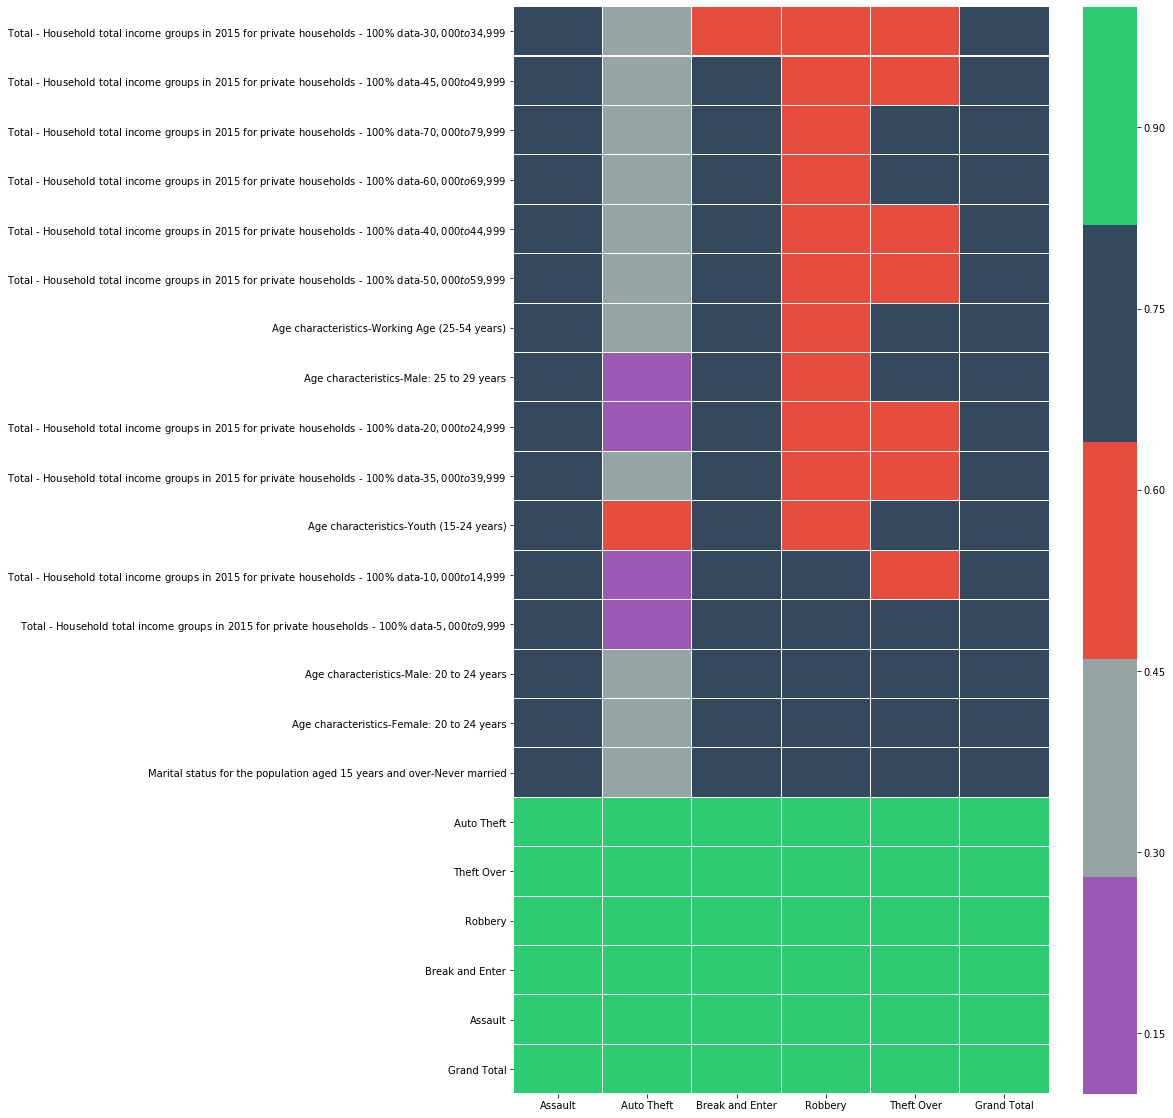

In [183]:
##Plotted correlation after VIF ( after multiple variables were dropped due to Multicollinearity)
plt.figure(figsize = (12,20))
sns.heatmap(corr[corr['Grand Total'] > 0.7], cmap = ["#9b59b6", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"],linecolor = 'white', linewidth = .05)

In [194]:
## create category/ label column for safe and dangerous. Used 0.7 because thats when the curve drops off
filter_method = lambda x: 'safe' if x < 0.07 else 'dangerous' if x > -.07 else undefined
y["category_column"] = y["total_rate"].apply(filter_method)

In [39]:
y

,assault_rate,auto_theft_rate,be_rate,robbery_rate,theft_over_rate,total_rate,category_column
id,,,,,,,
1.0,0.040519,0.049624,0.019390,0.011080,0.007220,0.127833,dangerous
2.0,0.039633,0.008774,0.005048,0.013822,0.000541,0.067819,safe
3.0,0.026480,0.010163,0.009697,0.009604,0.001119,0.057063,safe
4.0,0.033011,0.012633,0.008299,0.009221,0.000830,0.063993,safe
5.0,0.033576,0.009979,0.006549,0.009667,0.000624,0.060395,safe
6.0,0.024641,0.010750,0.008184,0.004822,0.000973,0.049370,safe
7.0,0.019552,0.009863,0.010037,0.006561,0.000956,0.046969,safe
8.0,0.016407,0.010433,0.011443,0.003955,0.001599,0.043837,safe
9.0,0.006911,0.006418,0.013082,0.001604,0.001172,0.029189,safe


In [190]:
## In order to set labels as a variable for modeling, selected category column calculated from y crime rate calculation/ parameters
Y2= y['category_column']

In [185]:
#Descriptive stats of the variables in data
display(X2.describe())
print ('y describe')
y.describe()

,"Mother tongue for the total population excluding institutional residents-Germanic languages, n.i.e.",Mother tongue for the total population excluding institutional residents-Gujarati,Mother tongue for the total population excluding institutional residents-Kashmiri,Mother tongue for the total population excluding institutional residents-Konkani,Mother tongue for the total population excluding institutional residents-Nepali,Mother tongue for the total population excluding institutional residents-Oriya (Odia),Mother tongue for the total population excluding institutional residents-Sindhi,Mother tongue for the total population excluding institutional residents-Kurdish,Mother tongue for the total population excluding institutional residents-Catalan,"Mother tongue for the total population excluding institutional residents-Italic (Romance) languages, n.i.e.",...,Selected places of birth for the immigrant population-Greece,Selected places of birth for the immigrant population-Netherlands,Selected places of birth for the immigrant population-Portugal,Selected places of birth for the immigrant population-Algeria,Selected places of birth for the immigrant population-Morocco,Selected places of birth for the immigrant population-Somalia,Selected places of birth for the immigrant population-Bangladesh,Selected places of birth for the immigrant population-Iraq,Selected places of birth for the immigrant population-Korea; South,Selected places of birth for the immigrant population-Sri Lanka
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,...,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,0.357143,188.571429,0.642857,5.357143,17.857143,2.035714,17.107143,11.607143,0.750000,1.035714,...,137.392857,19.357143,275.857143,5.714286,13.928571,63.500000,179.250000,79.500000,191.821429,377.571429
std,1.424712,545.388544,1.783503,7.742317,57.764540,4.680298,37.847041,18.662738,2.467414,2.360986,...,173.777816,16.456208,551.703361,10.363387,21.262201,137.757868,389.026605,321.953513,391.608108,923.405000
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,40.000000,10.000000,30.000000,0.000000,0.000000,0.000000,13.750000,0.000000,35.000000,25.000000
50%,0.000000,45.000000,0.000000,0.000000,5.000000,0.000000,5.000000,5.000000,0.000000,0.000000,...,75.000000,20.000000,75.000000,0.000000,10.000000,17.500000,45.000000,17.500000,75.000000,75.000000
75%,0.000000,145.000000,0.000000,10.000000,15.000000,0.000000,15.000000,15.000000,0.000000,0.000000,...,156.250000,30.000000,217.500000,10.000000,20.000000,65.000000,165.000000,45.000000,166.250000,230.000000
max,10.000000,5295.000000,10.000000,45.000000,600.000000,30.000000,255.000000,120.000000,15.000000,10.000000,...,1035.000000,70.000000,4060.000000,85.000000,185.000000,1265.000000,2560.000000,3535.000000,3510.000000,7385.000000


y describe


,assault_rate,auto_theft_rate,be_rate,robbery_rate,theft_over_rate,total_rate
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,0.031453,0.006416,0.012692,0.006453,0.001818,0.058832
std,0.020403,0.005308,0.006077,0.004687,0.001409,0.031500
min,0.006074,0.001307,0.004952,0.000615,0.000281,0.017993
25%,0.016866,0.003654,0.008272,0.003187,0.000966,0.037011
50%,0.026156,0.005191,0.011373,0.005322,0.001394,0.051258
75%,0.040382,0.007817,0.015296,0.008331,0.002023,0.071777
max,0.128533,0.049624,0.038787,0.030486,0.007220,0.199430


---

## Lets run our classifer without scaling our data and see what we get

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [89]:
from sklearn.neighbors import KNeighborsClassifier

#Instantiate
knn = KNeighborsClassifier(n_neighbors=5)

#Train/fit
knn.fit(X_train, y_train)

#score
knn.score(X_test, y_test)

0.75

In [136]:

# search for an optimal value of K for KNN

# list of integers 1 to 20
# integers we want to try
k_range = np.arange(1,19)

# list of scores from k_range
test_scores = []
train_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain scores for train and test sets for KNeighborsClassifier with k neighbours
    
    knn.fit(X_train, y_train)
    
    test_score = knn.score(X_test, y_test)
    train_score = knn.score(X_train, y_train)
    # 4. add mean of scores for k neighbors to k_scores list 
    test_scores.append(test_score)
    train_scores.append(train_score)

print(test_scores)
print(train_scores)


[0.6428571428571429, 0.4642857142857143, 0.8214285714285714, 0.75, 0.75, 0.75, 0.7857142857142857, 0.7857142857142857, 0.7857142857142857, 0.7857142857142857, 0.7857142857142857, 0.7857142857142857, 0.7857142857142857, 0.7857142857142857, 0.7857142857142857, 0.7857142857142857, 0.7857142857142857, 0.7857142857142857]
[1.0, 0.7678571428571429, 0.7410714285714286, 0.7678571428571429, 0.7410714285714286, 0.7232142857142857, 0.7589285714285714, 0.7589285714285714, 0.7589285714285714, 0.75, 0.7232142857142857, 0.7232142857142857, 0.7321428571428571, 0.7321428571428571, 0.7321428571428571, 0.7321428571428571, 0.7321428571428571, 0.7321428571428571]


Text(0, 0.5, 'Cross-Validated Accuracy')

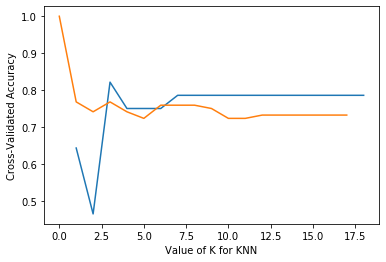

In [137]:
plt.plot(k_range, test_scores, train_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [191]:
##This cross validation accurary plot indicates that the standard # of Ks picked of 5 Was the correct number of Ks. The model ran the prediction with 1-20 number of Ks and when it used 5ks it was at the optimal level.

In [162]:
##classification report
from sklearn.metrics import classification_report
y_true, y_pred = y_test, knn_model_1.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

   dangerous       0.33      0.17      0.22         6
        safe       0.80      0.91      0.85        22

    accuracy                           0.75        28
   macro avg       0.57      0.54      0.54        28
weighted avg       0.70      0.75      0.72        28



In [192]:
##F1 score is the most accurate way of measuring our classification model as it is the harmonic mean of the precision and recall, this indicates to us that the model without having been scaled which is pretty decent.

## Ran K means on demographic data

In [193]:
# Apply PCA and fit the features selected
## Applying PCA in order to reduce the dimension of our features space. By reducing the dimension we have fewer relationships between variables to consider we are less likely to overfit our model. 
pca = PCA()
pca.fit(X2, y2)
# Transform samples using the PCA fit
pca_data = pca.transform(X2)

In [143]:
print(pca.explained_variance_)

[1.00071338e+06 3.02314109e+05 1.99867145e+05 1.55491590e+05
 1.34506401e+05 7.52583955e+04 2.98767161e+04 2.32298404e+04
 1.65088866e+04 3.36381225e+03 2.85595582e+03 1.23856290e+03
 6.11433098e+02 4.03567785e+02 2.89966270e+02 2.33593918e+02
 1.69769255e+02 1.36696274e+02 1.23875572e+02 7.62730430e+01
 5.22608869e+01 3.85179482e+01 3.14532772e+01 2.57518578e+01
 2.16611789e+01 2.06512360e+01 1.48754559e+01 1.44761743e+01
 1.10019701e+01 1.05743952e+01 9.15407889e+00 8.54719965e+00
 7.03684718e+00 6.28135652e+00 5.75690449e+00 5.27185524e+00
 4.75073713e+00 4.45819805e+00 3.74802106e+00 3.32687588e+00
 2.95336410e+00 2.71252300e+00 2.20585955e+00 1.53766230e+00
 1.26639312e+00 9.06378039e-01 5.04641086e-01 3.20485478e-01
 4.99208889e-27 4.99208889e-27]


In [144]:

def euclideandistance(X2, y):   
    return np.sqrt(np.sum((X2 - y) ** 2))

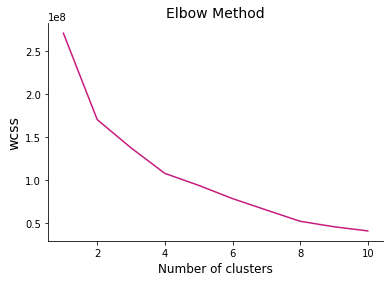

In [145]:

wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X2)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss, c="#c51b7d")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Elbow Method', size=14)
plt.xlabel('Number of clusters', size=12)
plt.ylabel('wcss', size=14)
plt.show()

In [60]:

# Kmeans algorithm
# n_clusters: Number of clusters. In our case 4
# init: k-means++. Smart initialization
# max_iter: Maximum number of iterations of the k-means algorithm for a single run
# n_init: Number of time the k-means algorithm will be run with different centroid seeds. 
# random_state: Determines random number generation for centroid initialization.
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=10, n_init=10, random_state=0)

# Fit and predict 
y_means = kmeans.fit_predict(X2)

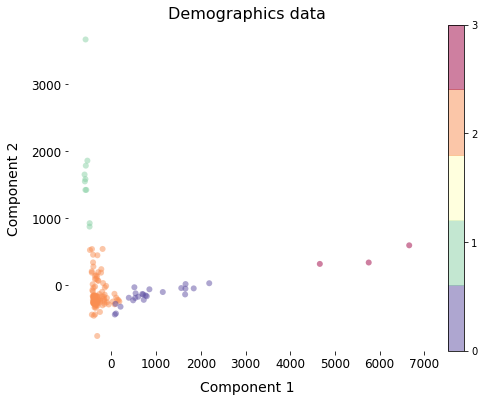

In [61]:

fig, ax = plt.subplots(figsize = (8, 6))

plt.scatter(pca_data[:, 0], pca_data[:, 1],
            c=y_means, 
            edgecolor="none", 
            cmap=plt.cm.get_cmap("Spectral_r", 5),
            alpha=0.5)
        
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False)

plt.xticks(size=12)
plt.yticks(size=12)

plt.xlabel("Component 1", size = 14, labelpad=10)
plt.ylabel("Component 2", size = 14, labelpad=10)

plt.title('Demographics data', size=16)


plt.colorbar(ticks=[0, 1, 2, 3, 4]);

plt.show()

In [62]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns = [X2])

In [63]:
centroids.index_name = "ClusterID"

In [64]:

centroids["ClusterID"] = centroids.index
centroids = centroids.reset_index(drop=True)

In [65]:
centroids

,"Mother tongue for the total population excluding institutional residents-Germanic languages, n.i.e.",Mother tongue for the total population excluding institutional residents-Gujarati,Mother tongue for the total population excluding institutional residents-Kashmiri,Mother tongue for the total population excluding institutional residents-Konkani,Mother tongue for the total population excluding institutional residents-Nepali,Mother tongue for the total population excluding institutional residents-Oriya (Odia),Mother tongue for the total population excluding institutional residents-Sindhi,Mother tongue for the total population excluding institutional residents-Kurdish,Mother tongue for the total population excluding institutional residents-Catalan,"Mother tongue for the total population excluding institutional residents-Italic (Romance) languages, n.i.e.",...,Selected places of birth for the immigrant population-Netherlands,Selected places of birth for the immigrant population-Portugal,Selected places of birth for the immigrant population-Algeria,Selected places of birth for the immigrant population-Morocco,Selected places of birth for the immigrant population-Somalia,Selected places of birth for the immigrant population-Bangladesh,Selected places of birth for the immigrant population-Iraq,Selected places of birth for the immigrant population-Korea; South,Selected places of birth for the immigrant population-Sri Lanka,ClusterID
0,2.220446e-16,435.869565,0.869565,12.608696,49.347826,4.130435,38.913043,17.608696,0.000000,0.434783,...,12.826087,55.217391,6.956522,10.869565,74.782609,644.782609,224.347826,75.434783,1117.391304,0
1,5.000000e-01,29.500000,0.500000,3.500000,2.500000,1.000000,4.000000,3.500000,1.500000,3.000000,...,14.500000,1997.000000,9.000000,9.500000,36.000000,52.500000,7.000000,56.000000,44.500000,1
2,4.326923e-01,79.567308,0.528846,3.509615,12.403846,1.634615,12.836538,11.057692,0.865385,1.009615,...,21.057692,164.903846,4.951923,14.903846,62.836538,76.201923,54.038462,233.557692,96.778846,2
3,0.000000e+00,2601.666667,3.333333,20.000000,16.666667,3.333333,41.666667,11.666667,0.000000,0.000000,...,26.666667,76.666667,11.666667,18.333333,91.666667,605.000000,93.333333,90.000000,5550.000000,3
